# Importing the varbiles

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

# Importing the Cleaned data 

In [2]:
heathdata_df = pd.read_csv('/Users/tamanikaid/Desktop/My documents /Data Analytics Course /Project-4-Data-Doctors/Resources/postgres.csv')
heathdata_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


The data above have already been cleaned by shola(team mate) by droping the ID coulum and droping any rows that contains any N/A.

# Exploring the Cleaned data

In [3]:
#data info 
heathdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 421.9+ KB


In [4]:
#sum
heathdata_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
#shape
heathdata_df.shape

(4908, 11)

In [6]:
#unique
heathdata_df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3851
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
#describe 
heathdata_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Convert categorical data to numeric with `pd.get_dummies`

In [8]:
heathdata_df = pd.get_dummies(heathdata_df,dtype=float)
heathdata_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,81.0,0,0,186.21,29.0,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [9]:
heathdata_df.sum()

age                               210400.12
hypertension                         451.00
heart_disease                        243.00
avg_glucose_level                 516799.65
bmi                               141814.50
stroke                               209.00
gender_Female                       2897.00
gender_Male                         2011.00
ever_married_No                     1704.00
ever_married_Yes                    3204.00
work_type_Govt_job                   630.00
work_type_Never_worked                22.00
work_type_Private                   2810.00
work_type_Self-employed              775.00
work_type_children                   671.00
Residence_type_Rural                2418.00
Residence_type_Urban                2490.00
smoking_status_Unknown              1483.00
smoking_status_formerly smoked       836.00
smoking_status_never smoked         1852.00
smoking_status_smokes                737.00
dtype: float64

# HeatMap

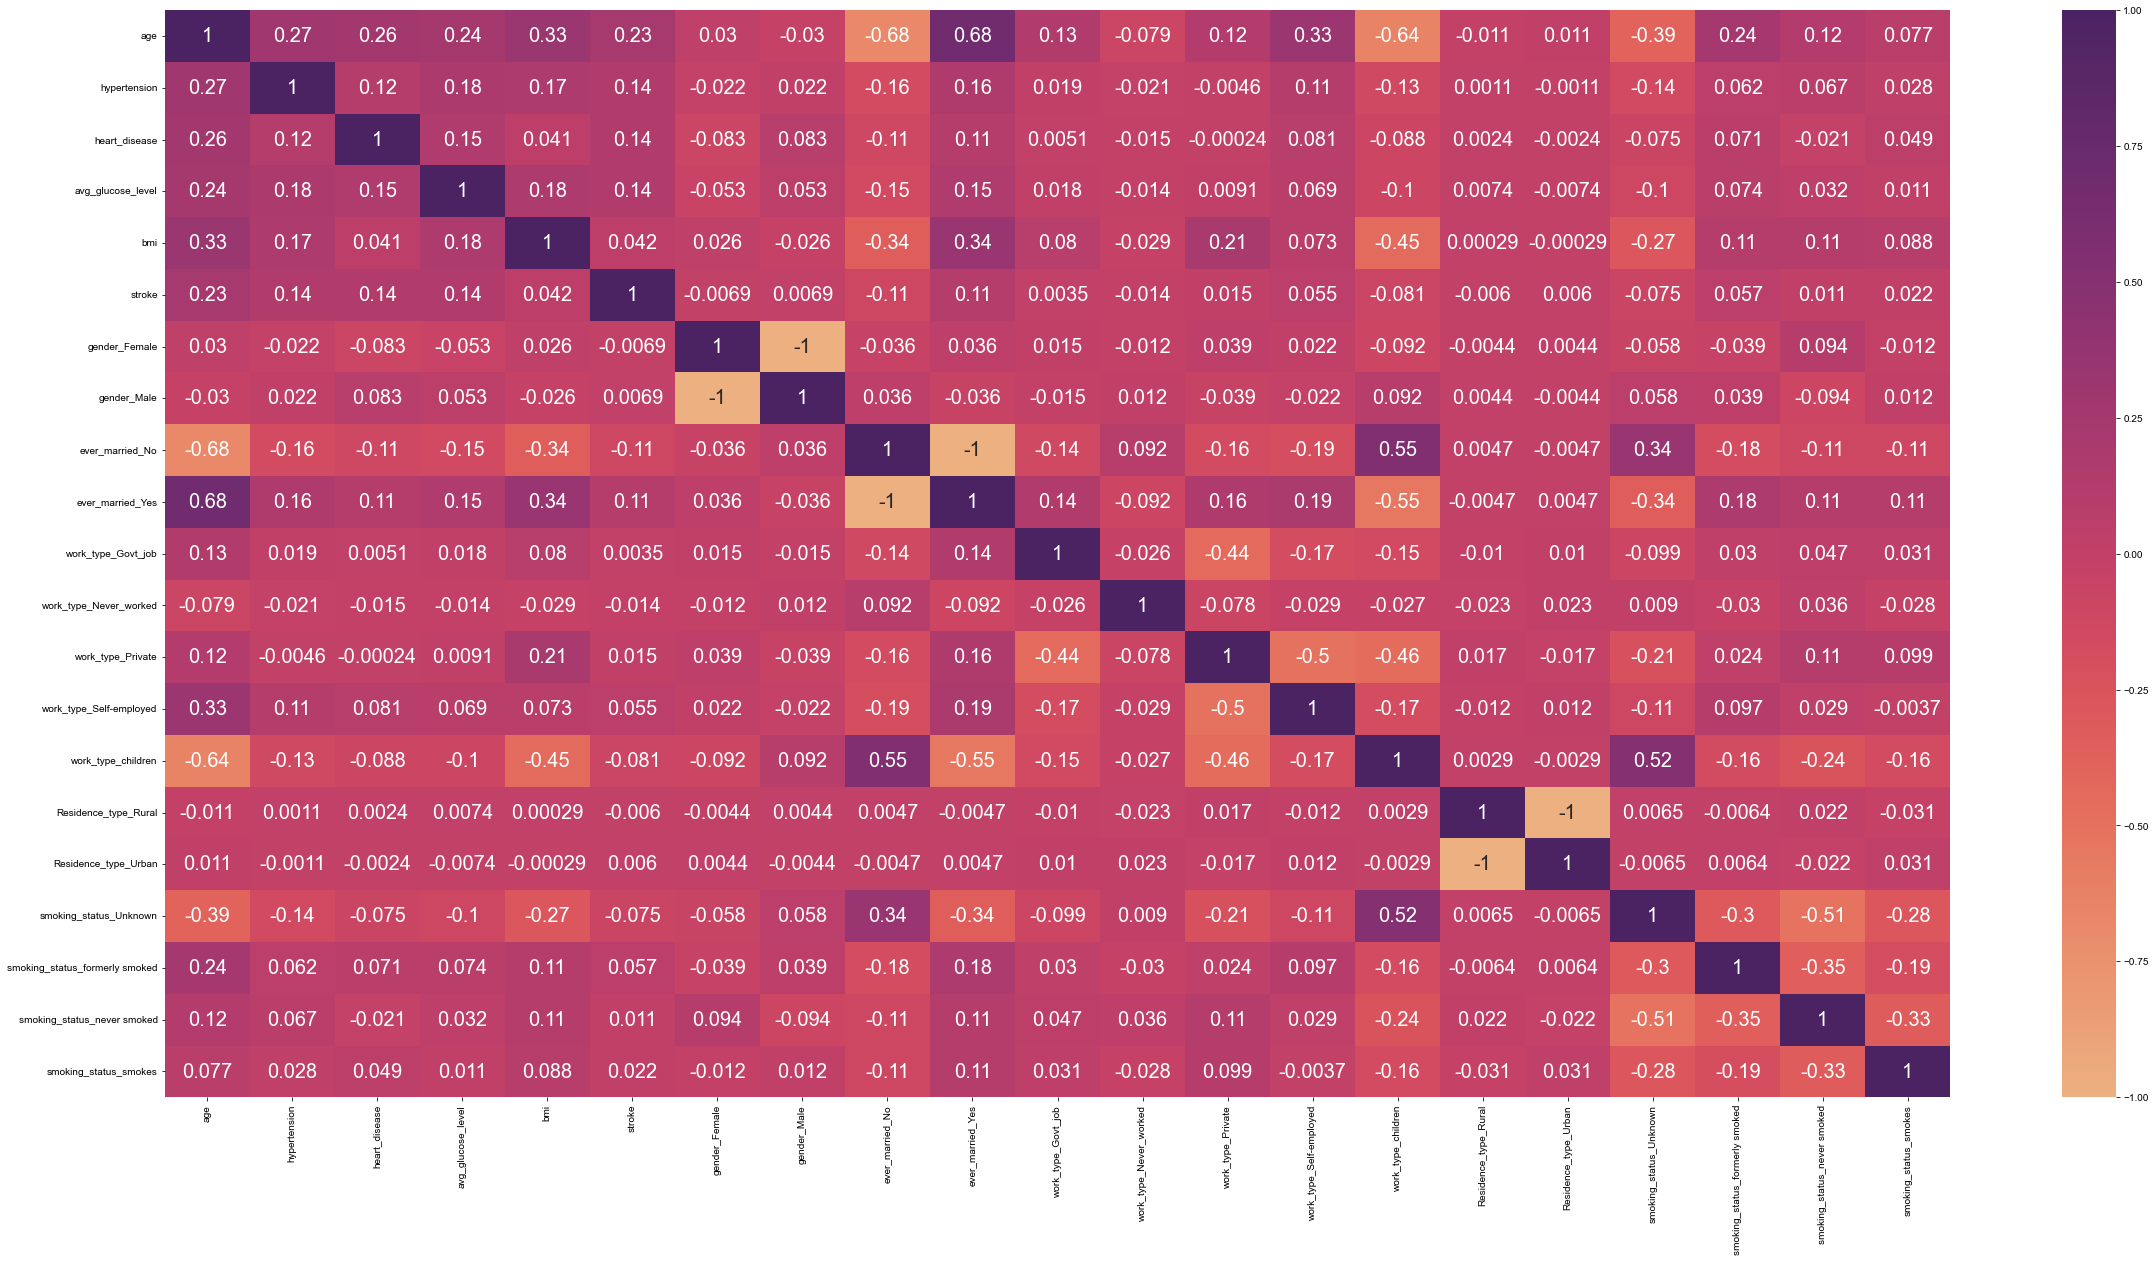

In [10]:
plt.figure(figsize=(40, 20))
sns.heatmap(heathdata_df.corr(), annot=True,cmap='flare', annot_kws={"size": 20} );
sns.set(font_scale=5) 

# Checking if the data is balanced 

0    4699
1     209
Name: stroke, dtype: int64

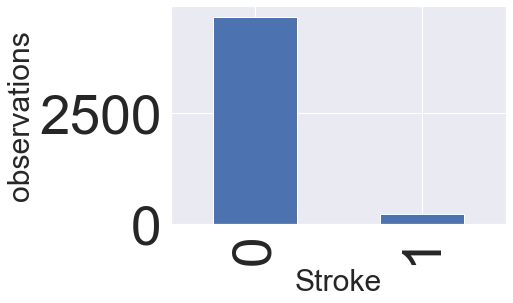

In [11]:
heathdata_df['stroke'].value_counts().plot(kind='bar')
plt.ylabel("observations", fontsize = 30)
plt.xlabel('Stroke', fontsize = 30)
heathdata_df.stroke.value_counts()

Looking at the above graph the data seem to be unbalnced, at this moment i will not balanced the data and would be looking to see if the data provdie an accurant results.

# Random Forsert Classifier 

In [12]:
X = heathdata_df.drop('stroke', axis=1)
y = heathdata_df['stroke'] != 1

In [13]:
print("Shape: ", X.shape, y.shape)

Shape:  (4908, 20) (4908,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9519152404237978


from the results above we can see clearly that the sample is overfitting. 

# Features Selection 

In [17]:
feature_importances = clf.feature_importances_ 

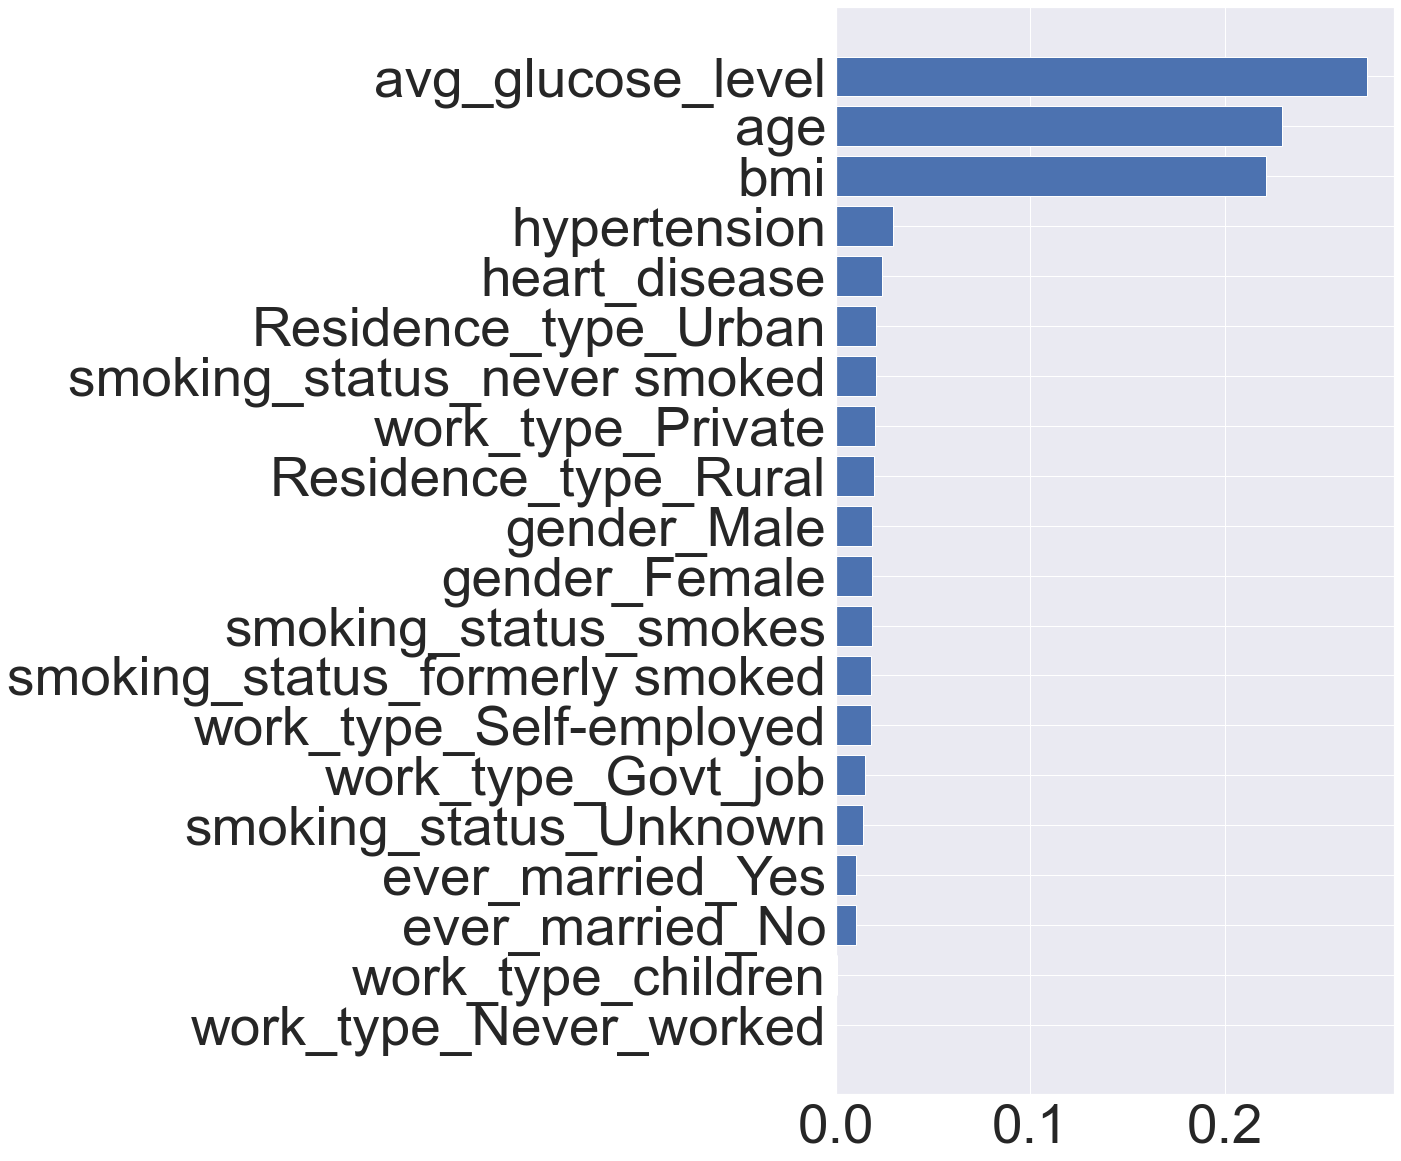

In [18]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)

ax.barh(y=cols, width=width)

plt.show()

In [19]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [20]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/tamanikaid/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [21]:
clf = RandomForestClassifier().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9527302363488183


In [22]:
clf = RandomForestClassifier()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9997283346916599
Testing Score: 0.9502852485737572


# Random Forsert Classifier with Features Selection 

In [23]:
X = heathdata_df[['age',                            
                   'hypertension',                         
                   'heart_disease',                      
                   'avg_glucose_level',                
                   'bmi',                               
                    ]]

y = heathdata_df['stroke']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9527302363488183


even with feature selection the data is still over fitting below i would be using SMOTE (an over sampling technquie) to balance out the data 

# GridSearchCV without balancing 

In [27]:
parameters ={'max_depth': [50, 90, 130],
     'criterion' : ['gini', 'entropy'],
     'n_estimators': [100,200,400]}
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

18

In [28]:
from sklearn.model_selection import GridSearchCV

grid_search = RandomForestClassifier()

grid_search = GridSearchCV(
    grid_search, 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

grid_result= grid_search.fit(X_train, y_train)

print('Best Params: ', grid_result.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 130, 'n_estimators': 200}


In [29]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.9584349743377972


In [30]:
pred = grid_search.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
print (classification_report (y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1169
           1       0.22      0.03      0.06        58

    accuracy                           0.95      1227
   macro avg       0.59      0.51      0.52      1227
weighted avg       0.92      0.95      0.93      1227



[[1162    7]
 [  56    2]]


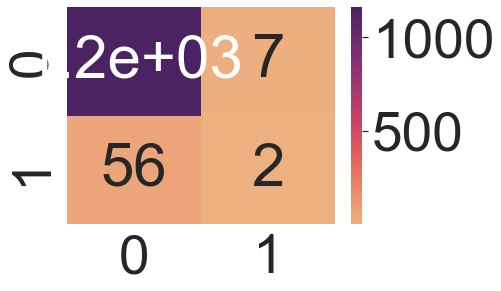

In [32]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,pred)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM, annot=True,cmap='flare')
plt.show()

we now need to balance out the data and it not giving us accuratce reuslts 

# Using SMOTE to balance the data out 

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
X_over = heathdata_df[['age',                            
                   'hypertension',                         
                   'heart_disease',                      
                   'avg_glucose_level',                
                   'bmi',                               
                    ]]

y_over = heathdata_df['stroke']

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_over, y_over, test_size= 0.2, random_state= 0)

In [36]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
over_sampleing = SMOTE(random_state=2)
x_train_over, y_train_over = sm.fit_resample(x_train1, y_train1.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

Before OverSampling, counts of label '1': 151
Before OverSampling, counts of label '0': 3530 

After OverSampling, the shape of train_X: (7520, 5)
After OverSampling, the shape of train_y: (7520,) 

After OverSampling, counts of label '1': 3760
After OverSampling, counts of label '0': 3760


# Radom Forest/GridSearchCV with SMOTE DATA 

In [38]:
from sklearn.model_selection import GridSearchCV

grid_search1 = RandomForestClassifier()

grid_search1 = GridSearchCV(
    grid_search1, 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)


grid_result1 = grid_search1.fit(x_train_over, y_train_over)

print('Best Params: ', grid_result1.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 50, 'n_estimators': 400}


In [39]:
print('Best Score: ', grid_result1.best_score_)

Best Score:  0.9263297872340426


In [40]:
y_pred_rfc_balance1 = grid_search1.predict(x_test1)

In [41]:
print(confusion_matrix(y_test1,y_pred_rfc_balance1))

[[838 101]
 [ 30  13]]


In [42]:
from sklearn.metrics import accuracy_score

print('The accuracy is: {:}'.format(accuracy_score(y_test1,y_pred_rfc_balance1)))

The accuracy is: 0.8665987780040734


In [43]:
print('The classification report is:\n{:}'.format(classification_report(y_test1,y_pred_rfc_balance1)))

The classification report is:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       939
           1       0.11      0.30      0.17        43

    accuracy                           0.87       982
   macro avg       0.54      0.60      0.55       982
weighted avg       0.93      0.87      0.89       982



[[838 101]
 [ 30  13]]


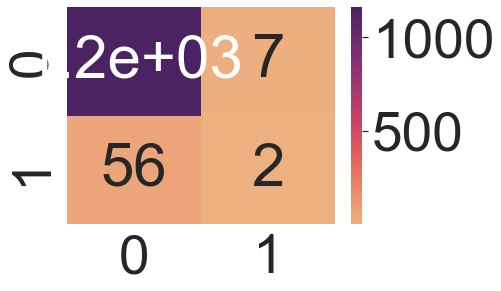

In [44]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(y_test1,y_pred_rfc_balance1)
print(CM1)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM, annot=True,cmap='flare')
plt.show()

# undersampling using RandomUnderSampler

In [45]:
X_U = heathdata_df[['age',                            
                   'hypertension',                         
                   'heart_disease',                      
                   'avg_glucose_level',                
                   'bmi',                               
                    ]]

y_U = heathdata_df['stroke']

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_U, y_U)

In [47]:
print(sorted(Counter(y_under).items()))

[(0, 209), (1, 209)]


In [48]:
x_train2, x_test2, y_train2 , y_test2 = train_test_split(X_under,y_under, test_size = 0.33, random_state = 43)

In [49]:
from sklearn.model_selection import GridSearchCV
grid_search = RandomForestClassifier()
grid_search = GridSearchCV(
    grid_search, 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

grid_result= grid_search.fit(x_train2, y_train2)
print('Best Params: ', grid_result.best_params_)

Best Params:  {'criterion': 'gini', 'max_depth': 130, 'n_estimators': 100}


In [50]:
print('Best Score: ', grid_result.best_score_)

Best Score:  0.775


In [51]:
y_pred_rfc_balance2 = grid_search.predict(x_test2)

In [52]:
print('The accuracy is: {:.4f}'.format(accuracy_score(y_test2,y_pred_rfc_balance2)))

The accuracy is: 0.7826


In [53]:
print('The classification report is:\n{:}'.format(classification_report(y_test2,y_pred_rfc_balance2)))

The classification report is:
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        65
           1       0.77      0.85      0.81        73

    accuracy                           0.78       138
   macro avg       0.79      0.78      0.78       138
weighted avg       0.79      0.78      0.78       138



[[46 19]
 [11 62]]


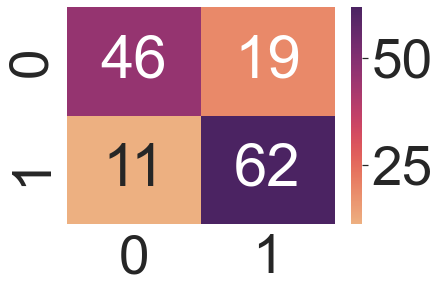

In [54]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(y_test2,y_pred_rfc_balance2)
print(CM2)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM2, annot=True,cmap='flare')
plt.show()

# Conclusion 

For my machine learning I used the health data that was download from Kaggel. 

The data was cleaned by a team member. 

I then imported and explored the data. From the data I found out that data is not balanced. 

Next I converted the categorical data to numeric using pd.get.dummies.  

In this model random forest classifier was used, and forest classifier with features selection, from this the results showed that the data was over fitting.

The data was then over sampled using the SMOTE however it produces an unbalanced confusion matrix. 

Then gridsearchCV was used but still gave an unbalanced confusion matrix. 

Then the data was undersampling using RandomUnderSampler which produce a better/ balanced  confusion matrix. 
